<a href="https://colab.research.google.com/github/Waleed-Azam/Master_NTNU_Waleed/blob/master/Copy_of_Simulated_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Lib

In [ ]:
#Prepare the nice data set
from sklearn.model_selection import train_test_split
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Bi2fJZw6Vhj7dyP7Ad6qtPsYf5LevEm4'})
downloaded_2= drive.CreateFile({'id':'12ZLwEA-DL3BWgcnmlET-2PcNdZGDGr0h'})

# Importing data from the Drive

In [ ]:
#Importing all the libraries
import numpy as np
import numpy as geek 
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation 
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd
downloaded.GetContentFile('Master_thesis_Data.csv')
#downloaded_1.GetContentFile('Test_17_sea.csv')
downloaded_2.GetContentFile('April_Without_Fish.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df3 = pd.read_csv('April_Without_Fish.csv') 
df2 = pd.read_csv('Master_thesis_Data.csv')
df3

,DVL_1,DVL_2,DVL_3,DVL_4,Down,Heading
0,0.000000,0.000000,0.000000,0.0,0.00,0.00
1,0.000000,0.000000,0.000000,0.0,0.00,0.00
2,0.000000,0.000000,0.000000,0.0,0.00,0.00
3,0.000000,0.000000,0.000000,0.0,0.04,3.90
4,0.000000,0.000000,0.000000,0.0,0.08,3.96
...,...,...,...,...,...,...
3056,0.671787,4.036387,4.954006,0.0,0.00,4.64
3057,0.671787,4.087367,4.750091,0.0,0.00,4.65
3058,0.722766,4.138345,4.750091,0.0,0.00,4.67
3059,0.722766,4.138345,4.750091,0.0,0.00,4.69


In [ ]:
import pandas as pd
df2 = pd.read_csv('Master_thesis_Data.csv') 
#df2=df2.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
#Cleaning the data, for mainly removing the NaN value
df2["Time"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2["ROV6DOF"] = df2["ROV6DOF"].fillna(0)
df2["ROV6DOF.1"] = df2["ROV6DOF.1"].fillna(0)
df2["ROV6DOF.2"] = df2["ROV6DOF.2"].fillna(0)
df2["ROV6DOF.3"] = df2["ROV6DOF.3"].fillna(0)

df2


,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,5.27,16.8,4.87,-3.37
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,5.25,16.8,4.87,-3.37
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,5.22,16.8,4.87,-3.37
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,5.20,16.8,4.87,-3.36


In [ ]:
df2.drop(84990) 
df2=df2.drop(84988)
df2=df2.drop(84987)
df2.drop(84990)
df2=df2.drop(84985)
df2=df2.drop(84990)
df2=df2.drop(84984)
df2=df2.drop(84983)
df2=df2.drop(84982)
df2=df2.drop(84981)
df2=df2.drop(84980)
df2=df2.drop(84986)
df2=df2.drop(84989)
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84975,8497.4,0.8,0.3,2.621668,1.8,2.691185,2.610809,2.621668,2.614601,5.55,17.0,4.87,-3.39
84976,8497.5,0.8,0.3,2.621745,1.8,2.691401,2.612374,2.621745,2.614807,5.52,17.0,4.87,-3.38
84977,8497.6,0.8,0.3,2.621804,1.8,2.691634,2.614254,2.621804,2.615026,5.50,17.0,4.87,-3.38
84978,8497.7,0.8,0.3,2.621820,1.8,2.691802,2.615765,2.621820,2.615181,5.47,16.9,4.87,-3.38


In [ ]:
df3=df3.drop(0) 
df2


,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.00
1,0.0,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
2,0.1,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
3,0.2,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
4,0.3,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84975,8497.4,0.8,0.3,2.621668,1.8,2.691185,2.610809,2.621668,2.614601,5.55,17.0,4.87,-3.39
84976,8497.5,0.8,0.3,2.621745,1.8,2.691401,2.612374,2.621745,2.614807,5.52,17.0,4.87,-3.38
84977,8497.6,0.8,0.3,2.621804,1.8,2.691634,2.614254,2.621804,2.615026,5.50,17.0,4.87,-3.38
84978,8497.7,0.8,0.3,2.621820,1.8,2.691802,2.615765,2.621820,2.615181,5.47,16.9,4.87,-3.38


In [ ]:
t=df2['Time']
Tdata=df2['DVL1_S']
X1=np.array(Tdata)
Tdata2=df2['DVL2_S']
X2=np.array(Tdata2)
Tdata3=df2['DVL3_S']
X3=np.array(Tdata)
Tdata4=df2['DVL4_S']
X4=np.array(Tdata4)
Tdata5=df2['ROV6DOF']
X5=np.array(Tdata5)
Tdata6=df2['ROV6DOF.1']
X6=np.array(Tdata6)
Tdata7=df2['ROV6DOF.2']
X7=np.array(Tdata7)
Tdata8=df2['ROV6DOF.3']
X8=np.array(Tdata8)

In [ ]:
# Stacking the two arrays along axis 0 
out_arr1_X_training = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_arr1_X_training) 
print ("Output Shape:\n ", out_arr1_X_training.shape) 

Output stacked array along axis 0:
  [[ 0.   20.   20.   ...  0.8   0.8   0.8 ]
 [ 0.   20.   20.   ...  0.3   0.3   0.3 ]
 [ 0.   20.   20.   ...  0.8   0.8   0.8 ]
 ...
 [ 0.    0.    0.   ... 17.   16.9  16.9 ]
 [ 0.    0.    0.   ...  4.87  4.87  4.87]
 [ 0.    0.    0.   ... -3.38 -3.38 -3.38]]
Output Shape:
  (8, 84980)


In [ ]:
X= out_arr1_X_training
X = X.transpose((1,0))
X.shape

(84980, 8)

In [ ]:
Tdata1=df2['DVL1']
y1=np.array(Tdata1)
Tdata22=df2['DVL2']
y2=np.array(Tdata22)
Tdata33=df2['DVL3']
y3=np.array(Tdata33)
Tdata44=df2['DVL4']
y4=np.array(Tdata44)

In [ ]:
# Stacking the two arrays along axis 0 
out_lab1_Target = geek.stack((y1, y2, y3, y4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_lab1_Target) 
print ("Labels Shape :\n ", out_lab1_Target.shape) 

Output stacked array along axis 0:
  [[ 0.       20.       20.       ...  2.691634  2.691802  2.691982]
 [ 0.       20.       20.       ...  2.614254  2.615765  2.617577]
 [ 0.       20.       20.       ...  2.621804  2.62182   2.621799]
 [ 0.       20.       20.       ...  2.615026  2.615181  2.615344]]
Labels Shape :
  (4, 84980)


In [ ]:
y= out_lab1_Target

In [ ]:
y=y.transpose((1,0))

In [ ]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X.dtype

dtype('float64')

In [ ]:
y.dtype

dtype('float64')

In [ ]:
X=X.reshape(84980,1,8)

In [ ]:
y=y.reshape(84980, 1,4)

In [ ]:
x_train=X[:64980]

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
y_train=y[:64980]

In [ ]:
x_val=X[64980:74980]

In [ ]:
x_val.dtype

dtype('float64')

In [ ]:
y_val=y[64980:74980]

In [ ]:
x_test=X[-10000:]

In [ ]:
y_test=y[-10000:]

In [ ]:
n_features=4

In [ ]:
n_steps=1

In [ ]:
import keras

In [ ]:
x_train.shape

(64980, 1, 8)

In [ ]:
y_train.shape

(64980, 1, 4)

In [ ]:
x_val.shape

(10000, 1, 8)

In [ ]:
y_val.shape

(10000, 1, 4)

In [ ]:
import tensorflow as tf

In [ ]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, Dropout
from keras.models import Model
from keras import backend as K
input_img=Input(shape=(n_steps, 8))
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
# Dropout 

x = Conv1D(16, 3, activation='relu', padding='same')(input_img)
x= MaxPooling1D(2, padding= 'same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Flatten()(x)
decoded = Dense(n_features*n_steps, activation='linear')(x)
outputs= Reshape((n_steps, n_features))(decoded)
#tf.reshape(tensor, shape, name=None)
autoencoder = Model(input_img, outputs)
opt = keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(opt, loss='mse')

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping

es =EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
history=autoencoder.fit(x_train, y_train,
                epochs=500,
                batch_size=32,
                shuffle=True,
                validation_data=(x_val, y_val), 
                callbacks= [es], verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Early Stopping.. Can be a wise option to observe
#tf.keras.callbacks.EarlyStopping(
   # monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False
#)

Epoch 1/500
2031/2031 [==============================] - 3s 1ms/step - loss: 2.3016 - val_loss: 0.0522
Epoch 2/500
2031/2031 [==============================] - 2s 1ms/step - loss: 0.1054 - val_loss: 0.0334
Epoch 3/500
2031/2031 [==============================] - 2s 1ms/step - loss: 0.0718 - val_loss: 0.0309
Epoch 4/500
2031/2031 [==============================] - 2s 1ms/step - loss: 0.0571 - val_loss: 0.0276
Epoch 5/500
2031/2031 [==============================] - 2s 1ms/step - loss: 0.0501 - val_loss: 0.0224
Epoch 6/500
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0442 - val_loss: 0.0181
Epoch 7/500
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0389 - val_loss: 0.0150
Epoch 8/500
2031/2031 [==============================] - 3s 1ms/step - loss: 0.0342 - val_loss: 0.0128
Epoch 9/500
2031/2031 [==============================] - 2s 1ms/step - loss: 0.0301 - val_loss: 0.0112
Epoch 10/500
2031/2031 [==============================] - 2s 1ms/step - l

dict_keys(['loss', 'val_loss'])


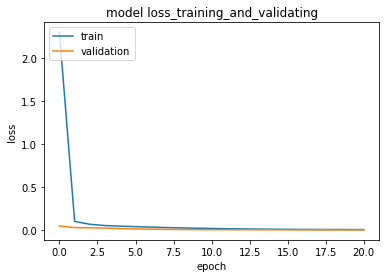

In [ ]:
 # list all data in history
print(history.history.keys())
# summarize history for accuracy
# History for Dropout 1st layer every layer after the maxpooling, 1e-3 in the first 2 layers and in the third layer, the regularization rate is 1e-01
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_training_and_validating')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y=autoencoder.predict(x_test)

In [ ]:
x_test.shape
xc=x_test.reshape((x_test.shape[0]*x_test.shape[1]), x_test.shape[2])

vc=y.reshape((y.shape[0]*y.shape[1]), y.shape[2])

In [ ]:
xc1=xc[:,0]
xc2=xc[:,1]
xc3=xc[:,2]
xc4=xc[:,3]

In [ ]:

vc=y.reshape((y.shape[0]*y.shape[1]), y.shape[2])
vc1=vc[:,0]
vc2=vc[:,1]
vc3=vc[:,2]
vc4=vc[:,3]

In [ ]:
t_test=t[-10000:]

# DVL prediction resutls

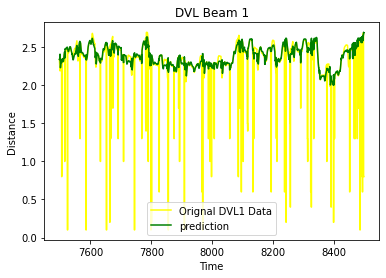

In [ ]:
fax = plt.gca()
plt.plot(t_test,xc1, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test,vc1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

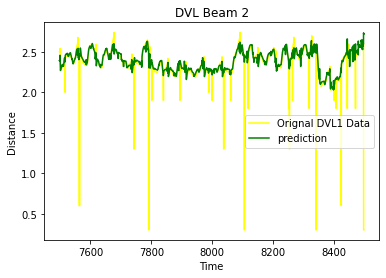

In [ ]:
fax = plt.gca()
plt.plot(t_test,xc2, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test,vc2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

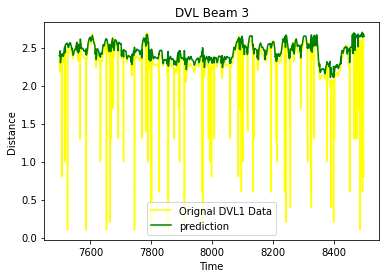

In [ ]:
fax = plt.gca()
plt.plot(t_test,xc3, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test,vc3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

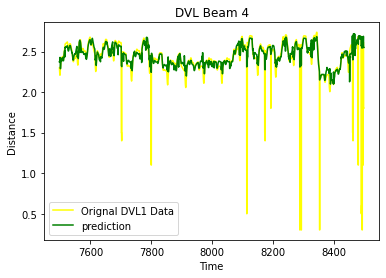

In [ ]:
fax = plt.gca()
plt.plot(t_test,xc4, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test,vc4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [ ]:
# Analysis for the few fishes, in order to remove them
t_test_2000=t_test[:2000]

In [ ]:
xc_2000=xc1[:2000]

In [ ]:
vc_2000=vc1[:2000]

In [ ]:
xc_2000f=xc2[:2000]
vc_2000f=vc2[:2000]

In [ ]:
xc_2000g=xc3[:2000]
vc_2000g=vc3[:2000]

In [ ]:
xc_2000h=xc4[:2000]
vc_2000h=vc4[:2000]

# DVL Beams predicition results for few samples

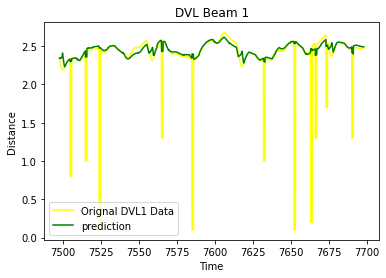

In [ ]:
fax = plt.gca()
plt.plot(t_test_2000,xc_2000, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test_2000,vc_2000, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

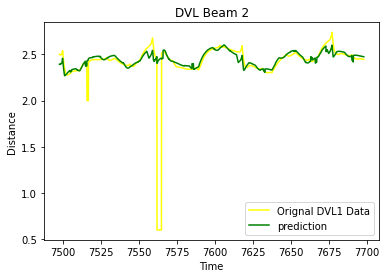

In [ ]:
fax = plt.gca()
plt.plot(t_test_2000,xc_2000f, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test_2000,vc_2000f, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

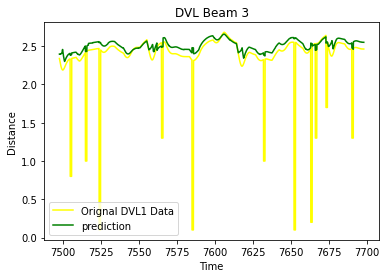

In [ ]:
fax = plt.gca()
plt.plot(t_test_2000,xc_2000g, color='yellow', label='Orignal DVL1 Data')

plt.plot(t_test_2000,vc_2000g, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

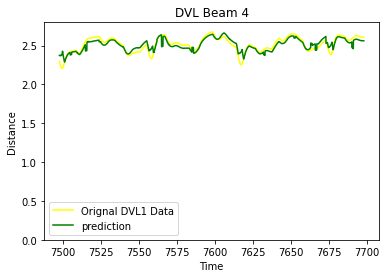

In [ ]:
fax = plt.gca()
plt.plot(t_test_2000,xc_2000h, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_test_2000,vc_2000h, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,2.8])
plt.show()